In [1]:
import os
os.chdir('..')

In [2]:
from models import SM_MNL
from models import SM_Nested
from models import LPMC_MNL_Full
from models import LPMC_MNL_DC
from models import MTMC_MNL
from algos import OptAlg

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

sns.set(font_scale=1.5)

data_folder = '../data/'
figures_folder = '../figures/'

# For the Python notebook
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [3]:
import biogeme.version as ver
ver.getText()

'biogeme 3.1.1 [January 1, 2019]\nVersion entirely written in Python\nHome page: http://biogeme.epfl.ch\nSubmit questions to https://groups.google.com/d/forum/biogeme\nMichel Bierlaire, Transport and Mobility Laboratory, Ecole Polytechnique Fédérale de Lausanne (EPFL)\n'

In [4]:
model = SM_MNL(data_folder)

In [5]:
ioa = OptAlg(alg_type='TR-ABS', direction='hess')
#ioa = OptAlg(alg_type='TR', direction='hess')

In [6]:
data = model.biogeme.database.data

In [7]:
model.biogeme.theC.setData(data.sample(100))

In [8]:
start = time.time()
res = model.optimize(ioa, **{'verbose': True, 
                             'nbr_epochs': 1000, 
                             'batch': 100,
                             'perc_hybrid': 0.1})
stop = time.time()

Maximizing the problem using a Trust Region ABS (init batch: 100) IOA with the Hessian direction.
Epoch 0:
  xk = [0.000, 0.000, 0.000, 0.000]
  f(xk) = 104.590
  ||gk|| = 3.649E+01
  stop_crit = 0.000E+00
  Solving sub-problem:
     Iter       <r,g>      curv
    ----------------------------
     1       1.33e+03  6.20e+04
     2       5.71e+01  5.90e+02
     3       4.01e+01  7.48e+02
     4       3.16e-02  2.90e-01
  rho = 1.099
  deltak = 5.00
  zk = [-0.43391765 -0.98025421 -0.89303207 -0.43832469]
  ||zk|| = 1.462E+00
  status: None

Epoch 0.014775413711583925:
  xk = [-0.434, -0.980, -0.893, -0.438]
  f(xk) = 79.016
  ||gk|| = 1.783E+01
  stop_crit = 9.154E-02
  Solving sub-problem:
     Iter       <r,g>      curv
    ----------------------------
     1       3.18e+02  7.53e+03
     2       1.31e+01  7.53e+01
     3       1.65e+01  2.02e+02
     4       5.30e-02  2.70e-01
  rho = 1.157
  deltak = 10.00
  zk = [ 0.46756241  0.37105212  0.3677049  -1.23878318]
  ||zk|| = 1.423E+00

  ||gk|| = 1.504E+01
  stop_crit = 1.403E-03
  Solving sub-problem:
     Iter       <r,g>      curv
    ----------------------------
     1       2.26e+02  2.02e+05
     2       6.10e+01  2.96e+04
     3       2.26e+01  2.12e+04
     4       2.84e+00  6.03e+02
  rho = 0.995
  deltak = 5801.62
  zk = [ 0.00491824 -0.01922655  0.02153509  0.02174171]
  ||zk|| = 3.647E-02
  status: None

Epoch 5.974586288416075:
  xk = [-0.155, -0.701, -1.084, -1.278]
  f(xk) = 5331.252
  ||gk|| = 1.349E-01
  stop_crit = 2.331E-05
  Solving sub-problem:
     Iter       <r,g>      curv
    ----------------------------
     1       1.82e-02  1.81e+01
     2       5.86e-03  2.79e+00
     3       1.45e-04  3.68e-02
     4       1.65e-04  1.22e-01
  rho = 1.000
  deltak = 9999.00
  zk = [-5.36402397e-05  6.13421568e-05 -2.13893805e-04 -1.88950639e-04]
  ||zk|| = 2.968E-04
  status: None

Algorithm Optimized!
  x* = [-0.155, -0.701, -1.084, -1.278]
  f(x*) = 5331.252


In [11]:
res['opti_time']

0.07015252113342285

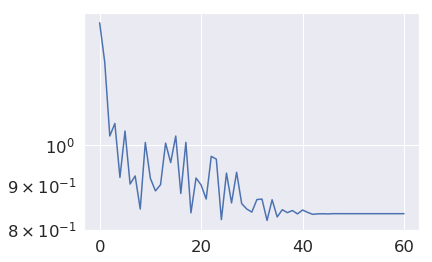

In [12]:
plt.semilogy(ioa.alg_type.abs.f_vals)

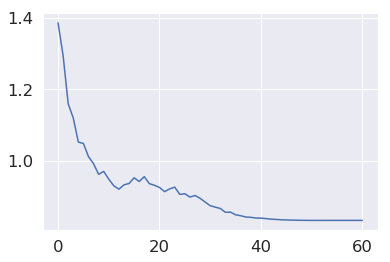

In [13]:
plt.plot(ioa.alg_type.abs.cum_avg)